In [26]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("data.csv")

<Figure size 1000x1000 with 0 Axes>

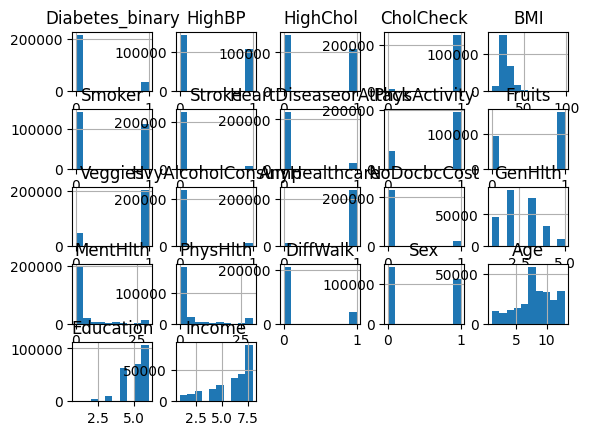

In [19]:
df.hist(figsize=(10, 10))
plt.show()

In [20]:
corr = df.corr()
corr['Diabetes_binary'].sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

In [21]:
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']
X = (X - X.mean()) / X.std() # StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((202944, 21), (50736, 21), (202944,), (50736,))

In [29]:
svc = SVC()
params = {
    'C': [0.1, 0.5, 1],
    'kernel': ['rbf', 'linear'],
    'degree': [2, 3, 4]
}

svc_grid = GridSearchCV(svc, params, cv=10)
svc_grid.fit(X_train, y_train)
print(svc_grid.best_estimator_)
print(svc_grid.best_params_)
print(svc_grid.best_score_)